In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt

/Users/giadarol/xsuite_packages/xtrack/xtrack/progress_indicator.py:95: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
line = xt.Line.from_json('pimms_00_optics.json')
tw = line.twiss(method='4d')

Loading line from dict:   0%|          | 0/220 [00:00<?, ?it/s]

Done loading line from dict.           
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `only_xtrack_frozen_energy`.


In [4]:
line.vars['kse1'] = 1
line.vars['kse2'] = -7

In [5]:
x = np.linspace(0, 2.5e-2, 20)

particles = line.build_particles(x=x, px=0)
line.track(particles, num_turns=2000, turn_by_turn_monitor=True)

mon = line.record_last_track

<IPython.core.display.Javascript object>


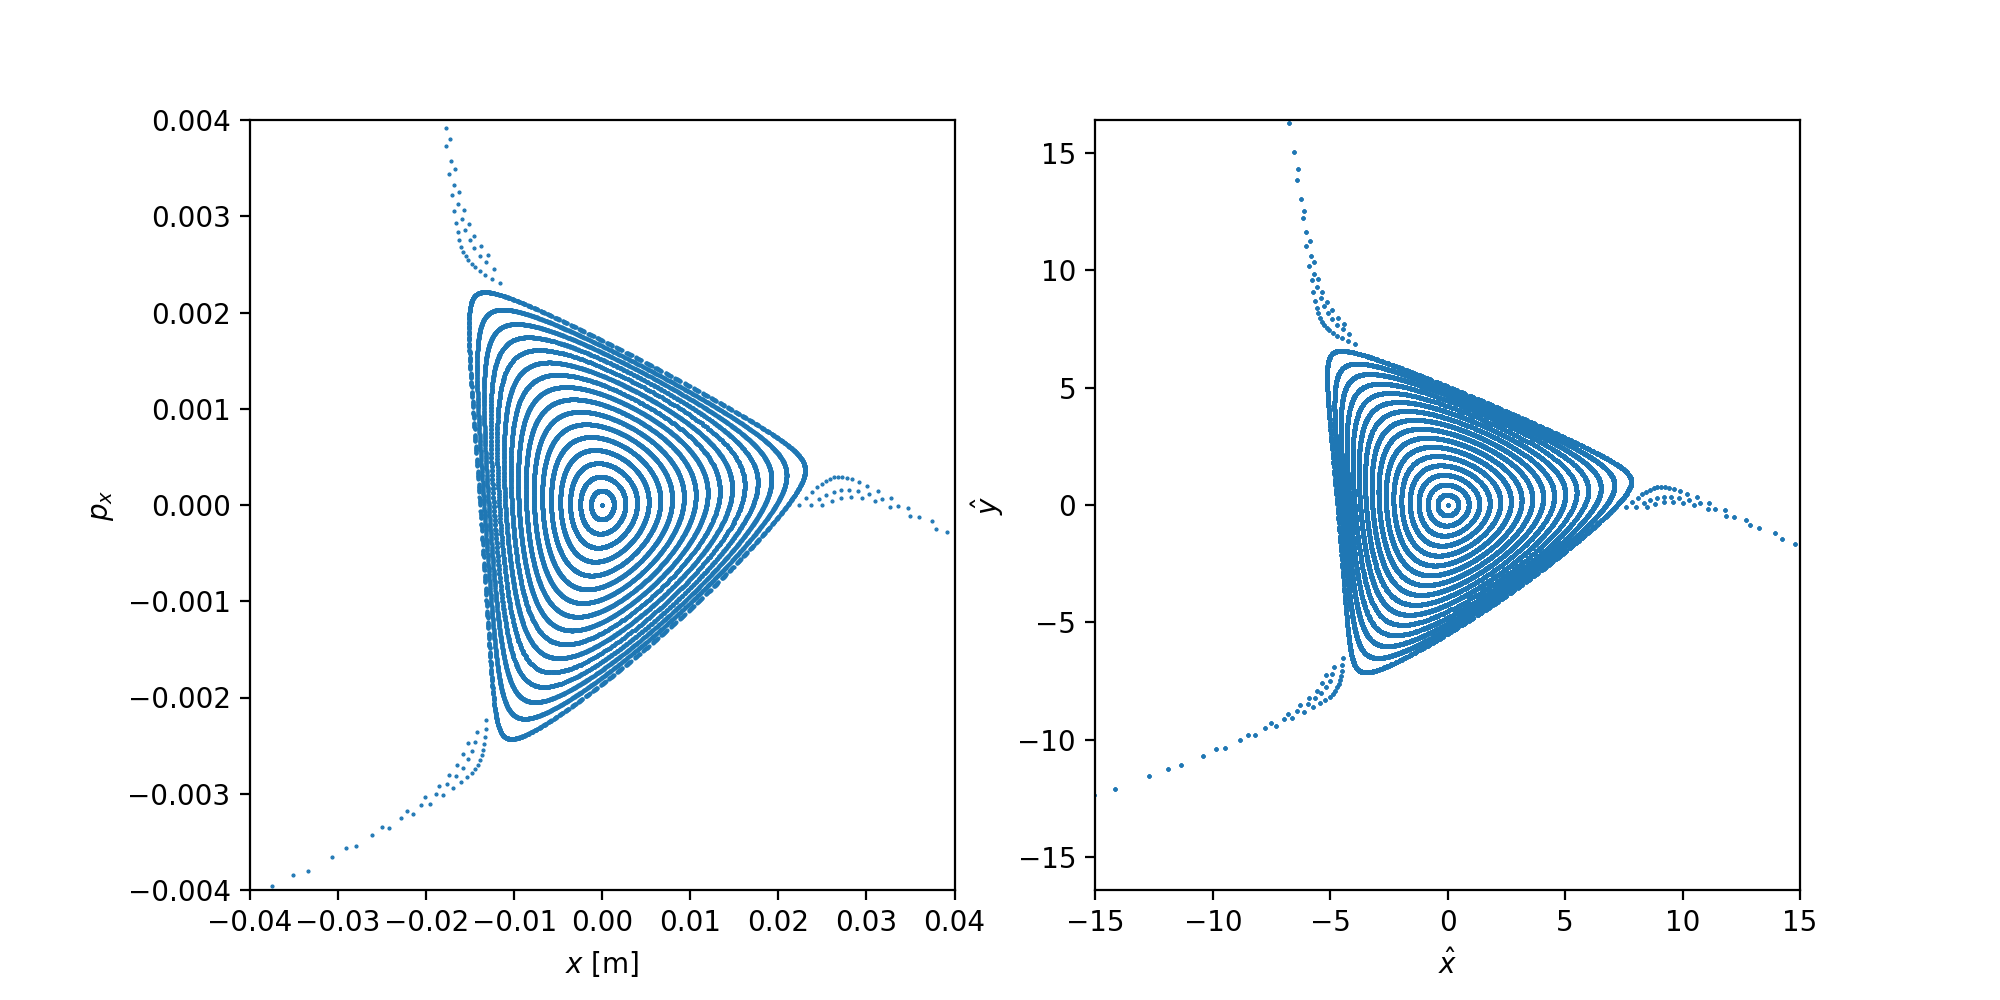

(-0.004, 0.004)

In [9]:
plt.figure(figsize=(10, 5))
ax_geom = plt.subplot(1, 2, 1)
plt.plot(mon.x.T, mon.px.T, '.', markersize=1, color='C0')
plt.ylabel(r'$p_x$')
plt.xlabel(r'$x$ [m]')
plt.xlim(-4e-2, 4e-2)
plt.ylim(-4e-3, 4e-3)

In [13]:
nc  = tw.get_normalized_coordinates(mon)
ax_norm = plt.subplot(1, 2, 2)
plt.plot(nc.x_norm.T * 1e3, nc.px_norm.T * 1e3,
         '.', markersize=1, color='C0')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.gca().set_aspect('equal', adjustable='datalim')

plt.xlabel(r'$\hat{x}$')
plt.ylabel(r'$\hat{y}$')

Text(979.6489898989898, 0.5, '$\\hat{y}$')

## Find separatrix

In [18]:
# Localize transition between stable and unstable
x_stable = 0
x_unstable = 3e-2
x_septum = 3.5e-2

while x_unstable - x_stable > 1e-6:
    x_test = (x_stable + x_unstable) / 2
    p = line.build_particles(x=x_test, px=0)
    line.track(p, num_turns=5000, turn_by_turn_monitor=True)
    mon = line.record_last_track
    if (mon.x > x_septum).any():
        x_unstable = x_test
    else:
        x_stable = x_test

### Track identified particles